Functional Programming
====================

In [67]:
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set()

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10,6 ]
matplotlib.rcParams.update({'font.size': 32})

x = np.linspace(0,2*np.pi,64)
i_range = range(-2, len(x)+2)

def plot_fun(fun, data):
    evaluated_data = list(map( fun, i_range))
    plt.plot(data, label="raw")
    plt.plot(i_range, evaluated_data, label="averaged")
    plt.legend()
    plt.xlabel("i")
    plt.ylabel("value")


Example: Moving average
======================



\begin{equation}
avg(i) = \frac{1}{3} \sum_{j=-1}^1 f(i+j)\\
\end{equation}

\begin{align}  
  f(i)  &=\begin{cases}
    g(0) & \text{if $i<0$}\\
    g(end) & \text{if $i>end$}\\
    g(i) & \text{otherwise}
  \end{cases}
\end{align}  



In a numerical context g is a data array that is defined at certain discrete locations i in the interval [0, end]

In [68]:
def avg(data):
    avg_values = []
    for i,value in enumerate(data):
        # Handling left boundary
        if i == 0:
            left_val = value
        else:
            left_val = data[i-1]
            
        # Handling right boundary
        if i == len(data) - 1:
            right_val = value 
        else:
            right_val = data[i+1]
        
        # Actual moving average computation
        avg_value = (right_val + left_val + value)/3.
        
        avg_values.append(avg_value)
    return avg_values                

Text(0, 0.5, 'value')

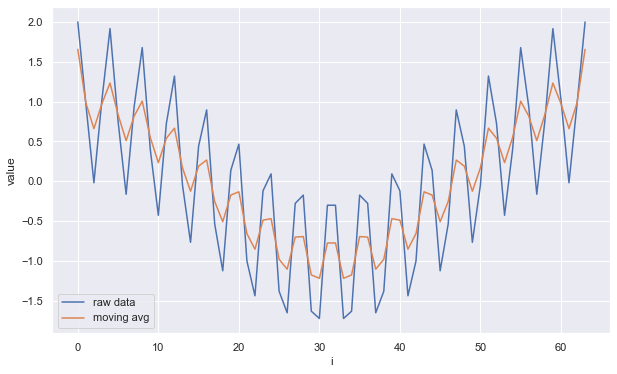

In [69]:
# Signal  plus noise
x = np.linspace(0,2*np.pi,64)
data = np.cos(x) + np.cos(16*x)

# Plot it
plt.plot(data, label="raw data")
plt.plot(avg(data), label="moving avg")
plt.legend()
plt.xlabel("i")
plt.ylabel("value")


\begin{align}
avg(i) & = \frac{1}{3} \sum_{j=-1}^1 f(i+j)\\
\end{align}

In [70]:
def get_avg(f):
    def avg(i):
        return 1./3 * (f(i-1) + f(i) + f(i+1))
    return avg

\begin{align}
  f(i) & =\begin{cases}
    g(0) & \text{if $i<0$}\\
    g(end) & \text{if $i>end$}\\
    g(i) & \text{otherwise}
  \end{cases}
\end{align}

In [71]:
def get_f(g, end):
    def f(i):
        if i < 0:
            return g(0)
        elif i > end:
            return g(end)
        else:
            return g(i)        
    return f

In [72]:
def get_g(data):
    def g(i):
        if i >= 0 and i < len(data):
            return data[i]
        else:
            raise Exception("out of range")
    return g

In [73]:
def get_avg(f):
    def avg(i):
        return 1./3 * (f(i-1) + f(i) + f(i+1))
    return avg

def get_f(g, end):
    def f(i):
        if i < 0:
            return g(0)
        elif i > end:
            return g(end)
        else:
            return g(i)        
    return f

def get_g(data):
    def g(i):
        if i >= 0 and i < len(data):
            return data[i]
        else:
            raise Exception("out of range")
    return g



Higher order functions

In [89]:
g = get_g(data)
end_index = len(data)-1
f = get_f(g,end_index)

avg = get_avg(f)
avg

<function __main__.get_avg.<locals>.avg(i)>

In [90]:
avg(5)

0.8359309346831396

In [93]:
averaged_data = list(map( avg, i_range))

Lazy evaluation

In [76]:
def get_avg_fun(data, get_extrapolator, get_averager):
    end = len(data) -1
    g = get_g(data)
    f = get_extrapolator(g,end)
    return get_averager(f)

Function composition

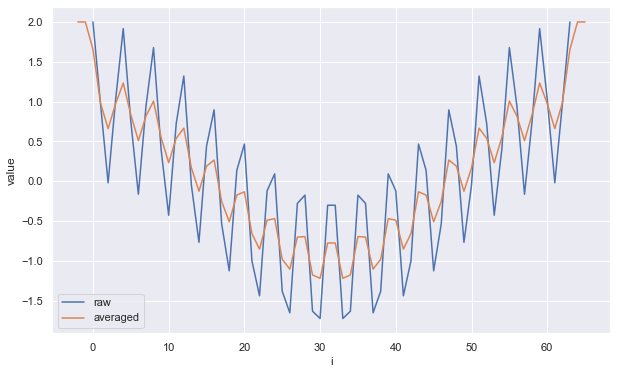

In [77]:
avg = get_avg_fun(
    data=data, 
    get_extrapolator=get_f, 
    get_averager=get_avg
)
plot_fun(avg, data)

* Processing building blocks can be exchanged easily




Linear extrapolation at boundaries
=============================


\begin{align}
  f(i) & =\begin{cases}
    g(0) + i \frac{d g}{d i}\vert_{0} & \text{if $i<0$}\\
    g(end) + (i-end) \frac{d g}{d i}\vert_{end} & \text{if $i>end$}\\
    g(i) & \text{otherwise}
  \end{cases}
\end{align}

In [78]:
def get_fwd_d(g):
    def fwd_dg(i):
        return g(i+1) - g(i)
    return fwd_dg

In [79]:
def get_bwd_d(g):
    def bwd_dg(i):
        return g(i) - g(i-1)
    return bwd_dg

In [80]:
def get_linear_extrapolator(g, end):
    def f(i):
        if i < 0:
            dg_di = get_fwd_d(g)
            return g(0) + i * dg_di(0)  
        elif i > end:
            dg_di = get_bwd_d(g)
            return f(end) + (i-end) * dg_di(end)
        else:
            return g(i)
        
    return f

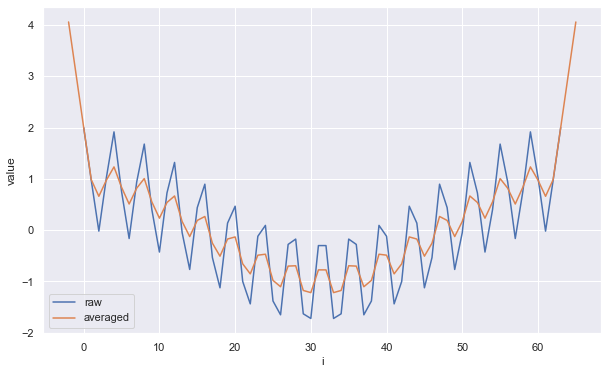

In [81]:
avg = get_avg_fun(
    data=data, 
    get_extrapolator=get_linear_extrapolator, 
    get_averager=get_avg
)

plot_fun(avg,data)


\begin{align}
avg(i) & = \frac{1}{2n + 1} \sum_{j={-n}}^n f(i+j)\\
\end{align}

In [82]:
def get_sum(f,i_start,n_points):
    if n_points == 1:
        return f(i_start)
    else:
        return f(i_start) + get_sum(f,i_start+1, n_points-1)


In [83]:
def get_avg_generic(f, n):
    def avg(i):
        n_vals = (1+2*n)
        return 1./(n_vals) * get_sum(f, i-n, n_vals)
    return avg

Recursion


In [84]:
def get_avg_n(n):
    def avg_n(f):
        return get_avg_generic(f, n)
    return avg_n

Partial function application

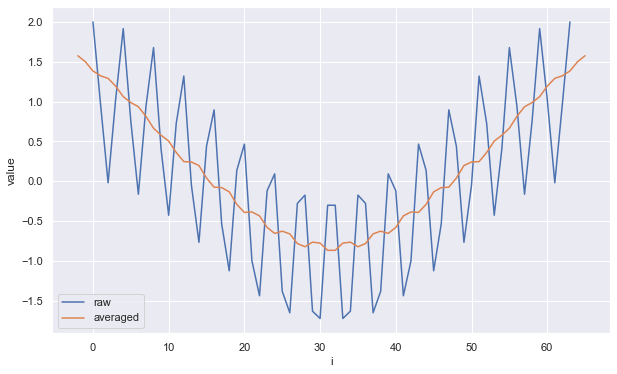

In [85]:
avg = get_avg_fun(data=data, get_extrapolator=get_f, get_averager=get_avg_n(10))

plot_fun(avg,data)


In [94]:
def get_averager(data):
    return get_avg_fun(
        data=data, 
        get_extrapolator=get_linear_extrapolator, 
        get_averager=get_avg_n(10)
    )


avg = get_averager([1,3,3,4,5])
avg(3)

2.714285714285714

In [87]:
def memoize(f):
    memo = {}
    def memoized_f(i):
        if i in memo:
            print("cache hit")
            return memo[i]
        else:
            print("function evaluation")
            memo[i] = f(i)
            return memo[i]
    return memoized_f

In [88]:
def expensive_function(i):
    #expensive_stuff
    return 2*i

f_mem = memoize(expensive_function)
f_mem(3)
f_mem(3)
f_mem(3)
f_mem(4)

function evaluation
cache hit
cache hit
function evaluation


8



* Every variable used in the functional code is "const" => immutability

Advantages
-----------

* Expressive/ Close to mathematical problem definition
* Testable
* Modular
* Lazy evaluation, Declarative (Performance)
* No mutable state
* Concurrency


Disadvantages
---------------------
* Performance (Recursion, Tail Call Optimization, Immutability)
* Debugging recursive code
* Language support (also related to performance)
* Library support
